#### Do the following in the iris dataset.

#### 1. Read the dataset to the python environment.

#### 2. Do necessary pre-processing steps.

#### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("iris.xls")

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
df.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# 2. Do necessary pre-processing steps

In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

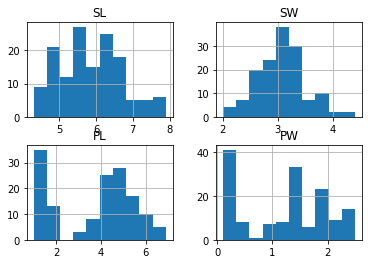

In [9]:
fg=df.select_dtypes(include=['float'])
fg.hist()
plt.show()

In [10]:
#normally distributed graphs

In [11]:
for i in ['SL', 'SW', 'PL']:
    df[i]=df[i].fillna(df[i].median())

<AxesSubplot:>

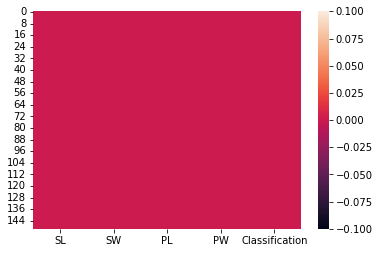

In [12]:
sns.heatmap(df.isna())

we are successfylly handled with all null values

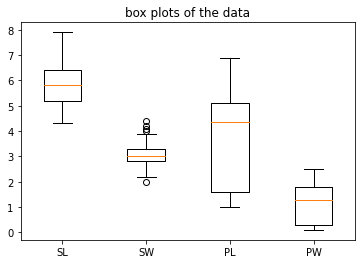

In [13]:
plt.figure()
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']],labels=['SL', 'SW', 'PL', 'PW'])
plt.title('box plots of the data')
plt.show()

sw having some outliers

In [14]:
q1=np.percentile(df['SW'],25,interpolation='midpoint')
q2=np.percentile(df['SW'],50,interpolation='midpoint')
q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [15]:
print(q1)
print(q2)
print(q3)

2.8
3.0
3.25


In [16]:
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr

In [17]:
print(lw,up)

2.1249999999999996 3.9250000000000003


In [18]:
outlier=[]
for x in df['SW']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [19]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [20]:
ind=(df['SW']>up)|(df['SW']<lw)
dt=df.loc[ind].index
df.drop(dt,inplace=True)

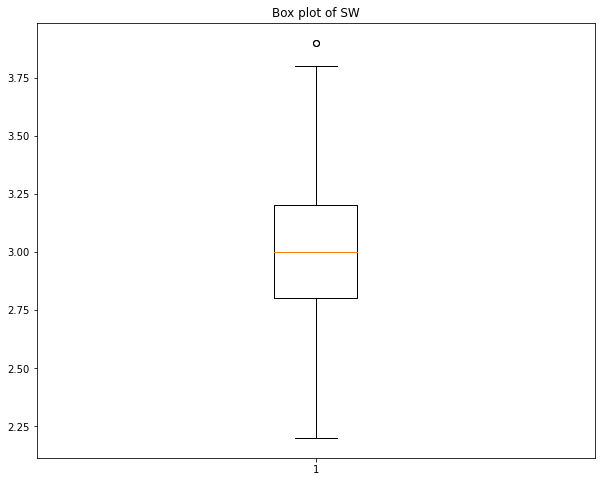

In [21]:
plt.figure(figsize=(10,8))
plt.boxplot(df['SW'])
plt.title('Box plot of SW')
plt.show()

removed the outliers

#### Label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

we have converted the categorical taget column to numerical, so that our model will be more accurate

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [71]:
#splitting the data
x=df.drop(['Classification'],axis=1)
y=pd.DataFrame(df['Classification'])

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [73]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [76]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [77]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

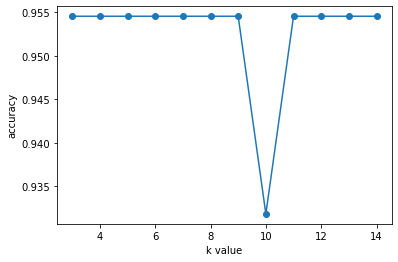

In [80]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [81]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [82]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [83]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [85]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149
confusion_matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 16]]


# SVM

In [87]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [88]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [89]:
#polinomial svm

In [90]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [91]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [92]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [93]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9318181818181818
precision score: 0.9236111111111112
recall_score: 0.93048128342246
f1 score: 0.9262187088274044


# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [95]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [96]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [97]:
#fine tuning of hyper parameters

In [98]:
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')

In [99]:
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [100]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [101]:
# getting the same accuracy score

In [102]:
# gradient boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [104]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


# Standardizing the features

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [106]:
#logistic Regression after standardization

In [107]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [108]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


In [109]:
# when we standardize the feature we are getting more accurate score of 97%

In [110]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [111]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


we are getting highest accuracy score of 97% on the Logistic Regression model, after Standardizing it.

In [112]:
# also doing other models after standardization

In [113]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [114]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


In [115]:
#DT

In [116]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [117]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9318181818181818
precision score: 0.9296296296296296
recall_score: 0.9197860962566846
f1 score: 0.9238095238095237


In [118]:
#KNN

In [119]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [120]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746
